In [2]:
import numpy as np
import gdal
import statsmodels.api as sm 
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["font.sans-serif"] = "Arial"
%matplotlib inline


In [3]:
try:
    ds = gdal.Open('S:\JESSE\GIS\DEM\ElevWatershed.tif')
except RuntimeError, e:
    print 'Unable to open .tif'
    print e
    sys.exit(1)

print ds.GetMetadata()

{'AREA_OR_POINT': 'Area'}


In [4]:
band1 = ds.GetRasterBand(1)
band2 = ds.GetRasterBand(2)


In [5]:
# turn into 1-d arrays, and only use values > 0 (sometimes no-value data is very large negative number)
array = band1.ReadAsArray().flatten()
array1 = array[array>0]
array2 = band2.ReadAsArray().flatten()
array2 = array2[array>0]

In [6]:
elderElev = array1[array2 == 1]
foxElev = array1[array2 == 2]
hankElev = array1[array2 == 3]
dryElev = array1[array2 == 4]

#Band 1 = elev
#Band 2 = watershed

#watershed key:
#Dry = 4
#Hank = 3
#Elder = 1
#Fox = 2

In [7]:
sorted_elderElev = np.sort(elderElev)
xElder = np.arange(sorted_elderElev.size)/float(len(sorted_elderElev))
yElder = sorted_elderElev

sorted_foxElev = np.sort(foxElev)
xFox = np.arange(sorted_foxElev.size)/float(len(sorted_foxElev))
yFox = sorted_foxElev


sorted_dryElev = np.sort(dryElev)
xDry = np.arange(sorted_dryElev.size)/float(len(sorted_dryElev))
yDry = sorted_dryElev


sorted_hankElev = np.sort(hankElev)
xHank = np.arange(sorted_hankElev.size)/float(len(sorted_hankElev))
yHank = sorted_hankElev


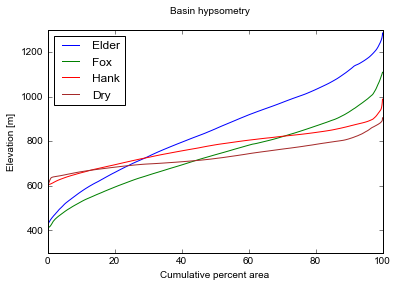

In [10]:

plt.step(100*xElder,yElder,color='blue',lw=1,zorder=-5, label='Elder')
plt.step(100*xFox,yFox,color='green',lw=1,zorder=-5, label='Fox')
plt.step(100*xHank,yHank,color='red',lw=1,zorder=-5, label='Hank')
plt.step(100*xDry,yDry,color='brown',lw=1,zorder=-5, label='Dry')
plt.legend(loc='upper left')
plt.suptitle('Basin hypsometry')
plt.ylabel('Elevation [m]')
plt.xlabel('Cumulative percent area')
plt.savefig('BasinHypsometry.pdf')

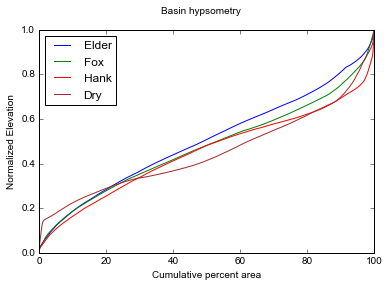

In [11]:
#Normalize
yDryN = (yDry - min(yDry)) / (max(yDry)-min(yDry))
yFoxN = (yFox - min(yFox)) / (max(yFox)-min(yFox))
yElderN = (yElder - min(yElder)) / (max(yElder)-min(yElder))

yHankN = (yHank - min(yHank)) / (max(yHank)-min(yHank))

plt.step(100*xElder,yElderN,color='blue',lw=1,zorder=-5, label='Elder')
plt.step(100*xFox,yFoxN,color='green',lw=1,zorder=-5, label='Fox')
plt.step(100*xHank,yHankN,color='red',lw=1,zorder=-5, label='Hank')
plt.step(100*xDry,yDryN,color='brown',lw=1,zorder=-5, label='Dry')
plt.legend(loc='upper left')
plt.suptitle('Basin hypsometry')
plt.ylabel('Normalized Elevation')
plt.xlabel('Cumulative percent area')
plt.savefig('NormalizedBasinHypsometry.pdf')